In [70]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np
import tensorflow
import datetime
import cv2
import os
tensorflow.__version__

'2.13.0'

In [5]:
! git clone https://github.com/ijrios/Leukemia_Classification

Cloning into 'Leukemia_Classification'...
remote: Enumerating objects: 790, done.
remote: Counting objects: 100% (790/790), done.
remote: Compressing objects: 100% (760/760), done.
remote: Total 790 (delta 27), reused 785 (delta 26), pack-reused 0
Receiving objects: 100% (790/790), 10.73 MiB | 24.53 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [127]:
data_dir = '/content/Leukemia_Classification/data/images/Original'
class_labels = os.listdir(data_dir)  #Lista de carpetas, cada una representando una clase

images = []
labels = []

width = 224 #Ancho en píxeles
height = 224 #Altura en píxeles


for label, class_name in enumerate(class_labels):
    class_dir = os.path.join(data_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, (width, height))
            image = image / 255.0  #Normalización valores de píxeles al rango [0, 1]
            images.append(image)
            labels.append(label)
        else:
            print(f"Error al cargar la imagen: {image_path}")

images = np.array(images)
labels = np.array(labels)

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [135]:
#CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Train model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
10/10 [==============================] - 37s 4s/step - loss: 10.8081 - accuracy: 0.2188 - val_loss: 2.4517 - val_accuracy: 0.2250
Epoch 2/10
10/10 [==============================] - 40s 4s/step - loss: 1.5547 - accuracy: 0.2125 - val_loss: 1.3205 - val_accuracy: 0.2375
Epoch 3/10
10/10 [==============================] - 44s 5s/step - loss: 1.2391 - accuracy: 0.4281 - val_loss: 1.0228 - val_accuracy: 0.5625
Epoch 4/10
10/10 [==============================] - 33s 3s/step - loss: 0.9477 - accuracy: 0.5719 - val_loss: 1.0151 - val_accuracy: 0.4500
Epoch 5/10
10/10 [==============================] - 30s 3s/step - loss: 0.7498 - accuracy: 0.6969 - val_loss: 0.9216 - val_accuracy: 0.5250
Epoch 6/10
10/10 [==============================] - 32s 3s/step - loss: 0.4500 - accuracy: 0.8875 - val_loss: 1.0055 - val_accuracy: 0.6375
Epoch 7/10
10/10 [==============================] - 32s 3s/step - loss: 0.2780 - accuracy: 0.9156 - val_loss: 0.8158 - val_accuracy: 0.6625
Epoch 8/10
10/10 [=

In [129]:
Test_org = '/content/sodapdf-converted.jpg'

# Definir rangos de tolerancia para los colores en HSV
rosado_bajo = np.array([140, 100, 100])
rosado_alto = np.array([180, 255, 255])

rojo_bajo = np.array([0, 100, 100])
rojo_alto = np.array([40, 255, 255])


image = cv2.imread(Test_org)
image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
mask1 = cv2.inRange(image, rosado_bajo, rosado_alto)
mask2 = cv2.inRange(image, rojo_bajo, rojo_alto)
mask = cv2.bitwise_or(mask1, mask2)
result = cv2.bitwise_and(image, image, mask=mask)
result = cv2.resize(result, (224, 224))
image_name = Test_org.split(sep='/')[-1]
Test_seg = f'/content/Test-images/Seg-{image_name}'
cv2.imwrite(Test_seg, result)

True

In [103]:
import cv2
import numpy as np

image = cv2.imread('/content/sodapdf-converted.jpg')

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_color = np.array([40, 100, 90])
upper_color = np.array([80, 255, 255])
lower_black = np.array([0, 0, 0])
upper_black = np.array([179, 255, 30])

mask_color = cv2.inRange(hsv_image, lower_color, upper_color)
mask_black = cv2.inRange(hsv_image, lower_black, upper_black)
mask_combined = cv2.bitwise_and(mask_color, cv2.bitwise_not(mask_black))
result = cv2.bitwise_and(image, image, mask=mask_combined)

image_name = Test_org.split(sep='/')[-1]
Test_seg = f'/content/Test-images/Seg-{image_name}'
cv2.imwrite(Test_seg, result)

True

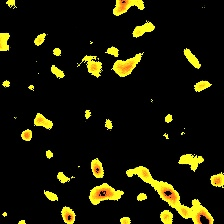

In [131]:
from IPython.display import Image, display

image_path = '/content/Test-images/Seg-sodapdf-converted.jpg'
display(Image(filename=image_path))

In [132]:
def input_samples (TEST):
    test_img = tensorflow.keras.preprocessing.image.load_img(TEST, target_size=(224, 224))
    x = tensorflow.keras.preprocessing.image.img_to_array(test_img)
    x = np.expand_dims(x, axis=0)
    x = x/255
    images = np.vstack([x])
    return images

In [139]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a formato RGB
    img = cv2.resize(img, target_size)  # Redimensionar la imagen al tamaño de entrada del modelo
    img = img / 255.0  # Normalizar los valores de píxeles al rango [0, 1]
    img = np.expand_dims(img, axis=0)  # Agregar una dimensión para que sea compatible con el modelo
    return img

In [113]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [138]:
model

In [141]:
Test_org = input_samples('/content/sodapdf-converted.jpg')


#Predicción de clase
start_time = datetime.datetime.now()

classes = model.predict([Test_org])
predicted_classes = np.argmax(classes, axis=1)

end_time = datetime.datetime.now()
elapsed_time = end_time - start_time

for predicted_class in predicted_classes:
    predicted_category = labels[predicted_class]

    if predicted_class == 0:
        print('La imagen pertenece a la categoría 0 (Benigna).')
    elif predicted_class == 1:
        print('La imagen pertenece a la categoría 1 (Early).')
    elif predicted_class == 2:
        print('La imagen pertenece a la categoría 2 (Pre).')
    elif predicted_class == 3:
        print('La imagen pertenece a la categoría 3 (Pro).')


1/1 [==============================] - 0s 58ms/step
La imagen pertenece a la categoría 0 (Benigna).
